## Phenotypic activity (Figs 3B, 3C)

Calculate mAP to assess phenotypic activity of each perturbation, i.e. retrieval its replicates against negative controls.

In [1]:
from pathlib import Path

import mygene
import numpy as np
import pandas as pd
import plotnine as gg

from map_utils.map import calculate_map
from map_utils.plot import plot_map_x3_hue, set_plotting_style
from cell_health_utils import get_6well_plate_pairs, get_cell_line_colors

In [2]:
set_plotting_style()
cell_line_colors = get_cell_line_colors()

ch_mad_path = "data/profiles/cell_health_profiles_merged_wholeplate_normalized_featureselected.tsv.gz"
profiles = pd.read_csv(ch_mad_path, sep="\t")
print(profiles.shape)

save_path = "figures"

(3456, 513)


In [3]:
pair_config = {
    "pos_sameby": {"all": ["Metadata_pert_name", "Metadata_control_index"], "any": []},
    "pos_diffby": {"all": [], "any": []},
    "neg_sameby": {"all": [], "any": []},
    "neg_diffby": {"all": ["Metadata_pert_name", "Metadata_control_index"], "any": []},
}

map_config = {
    "null_size": 10000,
    "groupby_columns": ["Metadata_pert_name"],
}

results = []
cell_lines = ["A549", "ES2", "HCC44"]

for cell_type in cell_lines:
    df_6wells = get_6well_plate_pairs(profiles, cell_type)
    print(f"\nProcessing cell type: {cell_type}")
    map_results = calculate_map(df_6wells, pair_config, map_config)
    map_results["cell_type"] = cell_type
    results.append(map_results)

results = pd.concat(results).reset_index(drop=True)
results["markers"] = np.where(results["p_value"] < 0.05, "p<0.05", "p>=0.05")
results.rename(columns={"cell_type": "Cell type"}, inplace=True)
results.to_csv("results/phenotypic_activity_map.csv", index=False)


Processing cell type: A549


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]


Processing cell type: ES2


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]


Processing cell type: HCC44


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/projects/map/map_utils/plot.py:274: UserWarning: The figure layout has changed to tight


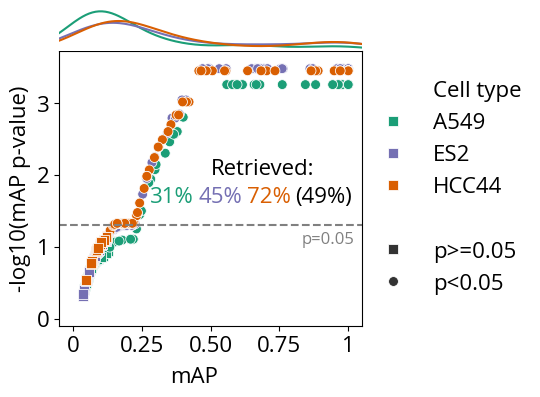

In [5]:
results["const"] = 1
plot_map_x3_hue(
    results,
    "const",
    "",
    hue_col="Cell type",
    palette=cell_line_colors,
    row=None,
    move_legend="center left",
    pr_x=0.5,
    pr_y=0.45,
    l_x=1.15,
    l_y=0.8,
    figure="Fig3B",
    save_path="figures",
)

### Plot scores for individual guides

In [5]:
guide_counts = results[results["p < 0.05"]].Metadata_pert_name.value_counts()
guides_consistent_acorss_cell_types = sorted(guide_counts[guide_counts > 1].index)
print(guides_consistent_acorss_cell_types)

guides_consistent_acorss_cell_types_18 = guides_consistent_acorss_cell_types[:18]
guide_consustent_results = results.query(
    "Metadata_pert_name in @guides_consistent_acorss_cell_types_18"
)

['ATF4-1', 'ATF4-2', 'AURKB-2', 'BRAF-2', 'BRD4-1', 'BRD4-2', 'CCND1-2', 'CCNE1-1', 'CCNE1-2', 'CDK2-1', 'CDK2-2', 'CDK4-1', 'CDK4-2', 'CDK4-3', 'CSNK1A1-1', 'CSNK1A1-2', 'CTNNB1-1', 'CTNNB1-2', 'EGFR-2', 'EGLN1-8', 'EGLN1-9', 'EZH2-1', 'GPX4-1', 'GPX4-2', 'ITGAV-1', 'ITGAV-2', 'KIF11-1', 'KIF11-2', 'KRAS-1', 'KRAS-2A', 'MAPK1-2', 'MTOR-1', 'MTOR-2', 'MYC-1', 'MYC-2', 'PIK3CA-1', 'PIK3CA-2', 'PTK2-1', 'PTK2-2', 'RHOA-1', 'RHOA-2', 'SLC2A1-1', 'SLC2A2-2', 'SMARCB1-1', 'SMARCB1-2', 'SUZ12-1', 'SUZ12-2', 'XBP-2']


/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 4 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/Fig3C.svg
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 4 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/Fig3C.png


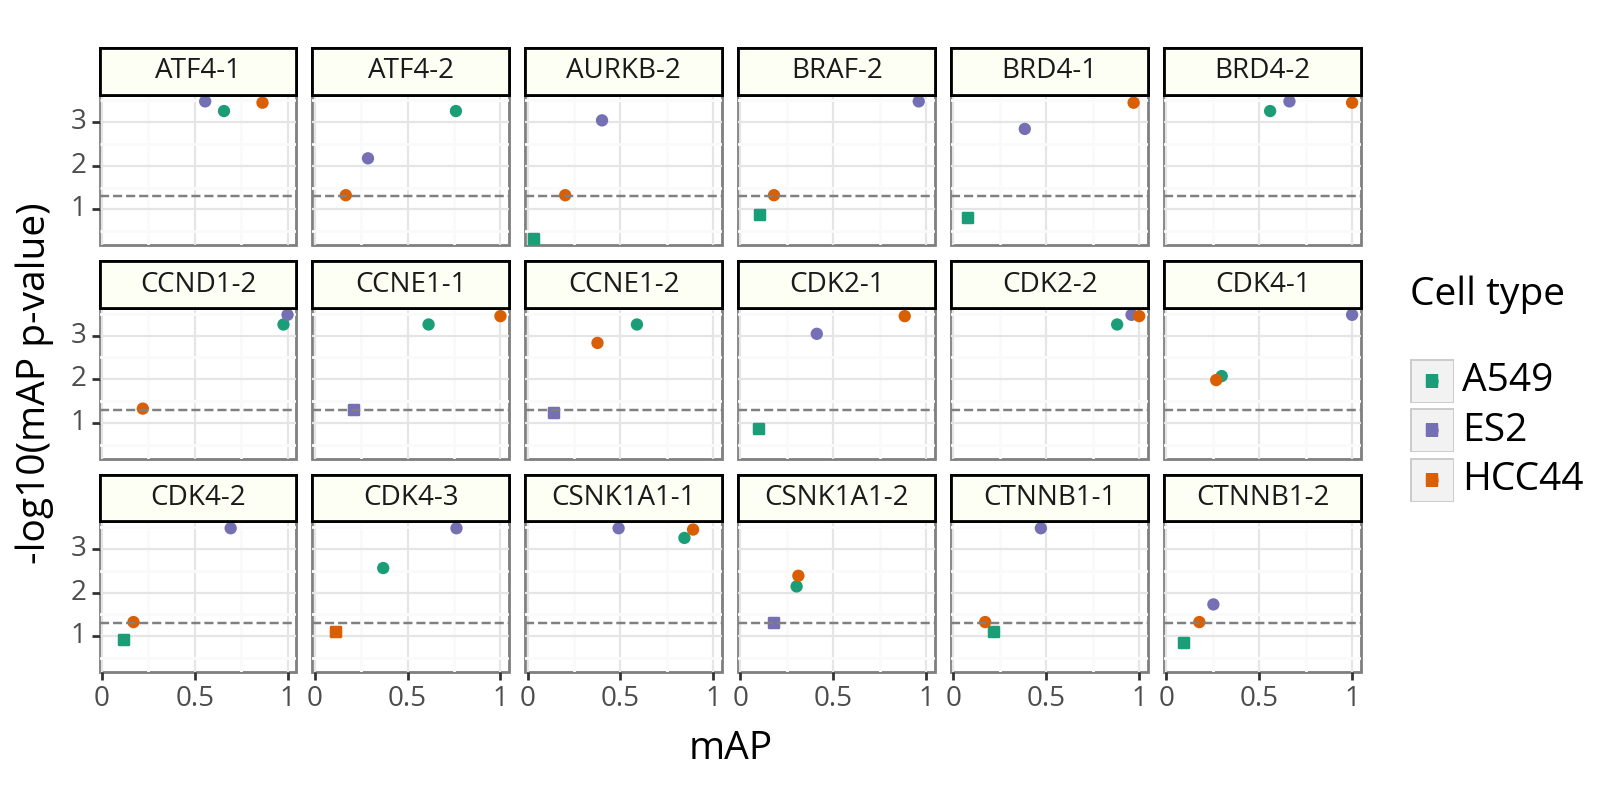

<Figure Size: (800 x 400)>

In [6]:
gene_gg = (
    gg.ggplot(
        guide_consustent_results,
        gg.aes(x="mAP", y="-log10(mAP p-value)", color="Cell type"),
    )
    + gg.geom_point(
        data=guide_consustent_results[~guide_consustent_results["p < 0.05"]],
        shape="s",
        size=1.5,
    )
    + gg.geom_point(
        data=guide_consustent_results[guide_consustent_results["p < 0.05"]],
        shape="o",
        size=1.5,
    )
    + gg.geom_hline(yintercept=-np.log10(0.05), linetype="dashed", color="grey")
    + gg.theme_bw()
    + gg.xlab("mAP")
    + gg.ylab("-log10(mAP p-value)")
    + gg.facet_wrap("~Metadata_pert_name", ncol=6)
    + gg.scale_color_manual(values=cell_line_colors)
    + gg.scale_x_continuous(breaks=[0, 0.5, 1.0])
    + gg.theme(
        strip_background=gg.element_rect(colour="black", fill="#fdfff4"),
        axis_text=gg.element_text(size=10),
        text=gg.element_text(family="Open Sans", size=14),
        axis_title=gg.element_text(family="Open Sans", size=14),
        legend_title=gg.element_text(margin={"b": 20}),
        strip_text=gg.element_text(size=10, family="Open Sans"),
        figure_size=(8, 4),
    )
)

gene_gg.save(f"{save_path}/Fig3C.svg")
gene_gg.save(f"{save_path}/Fig3C.png", dpi=500, height=4, width=8)

gene_gg

### Compare phenotypic activity using cutting vs empty well controls

In [7]:
ch_mad_df_6wells_empty = pd.concat(
    [
        get_6well_plate_pairs(profiles, cell_type, control="perturbation_control")
        for cell_type in cell_lines
    ],
    axis=0,
)

empty_results = []

for cell_type in cell_lines:
    print(f"\nProcessing cell type: {cell_type}")
    df = ch_mad_df_6wells_empty.query("Metadata_cell_line == @cell_type").reset_index(
        drop=True
    )

    map_results = calculate_map(df, pair_config, map_config)
    map_results["cell_type"] = cell_type
    empty_results.append(map_results)

empty_results = pd.concat(empty_results).reset_index(drop=True)
empty_results["markers"] = np.where(
    empty_results["p_value"] < 0.05, "p<0.05", "p>=0.05"
)
empty_results.rename(columns={"cell_type": "Cell type"}, inplace=True)

results["control_barcodes"] = "cutting_control"
empty_results["control_barcodes"] = "perturbation_control"
guide_results = pd.concat([results, empty_results]).reset_index(drop=True)
guide_results = guide_results.merge(
    profiles[["Metadata_gene_name", "Metadata_pert_name"]].drop_duplicates(),
    on="Metadata_pert_name",
    how="left",
)
guide_results.to_csv("results/phenotypic_activity_empty.csv", index=False)


Processing cell type: A549


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]


Processing cell type: ES2


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]


Processing cell type: HCC44


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/copairs/compute.py:152: RuntimeWarning: invalid value encountered in divide


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
control_compare_df = guide_results.pivot(
    index=["Metadata_pert_name", "Metadata_gene_name", "Cell type"],
    columns=["control_barcodes"],
    values="-log10(mAP p-value)",
).reset_index(drop=False)

cutting_mean = guide_results[
    guide_results.control_barcodes == "cutting_control"
].mAP.mean()
perturbation_mean = guide_results[
    guide_results.control_barcodes == "perturbation_control"
].mAP.mean()

above_diagonal = (control_compare_df["cutting_control"] > -np.log10(0.05)).mean()
below_diagonal = (control_compare_df["perturbation_control"] > -np.log10(0.05)).mean()

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 4 x 3.5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/control_comparison.png
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/control_comparison.svg


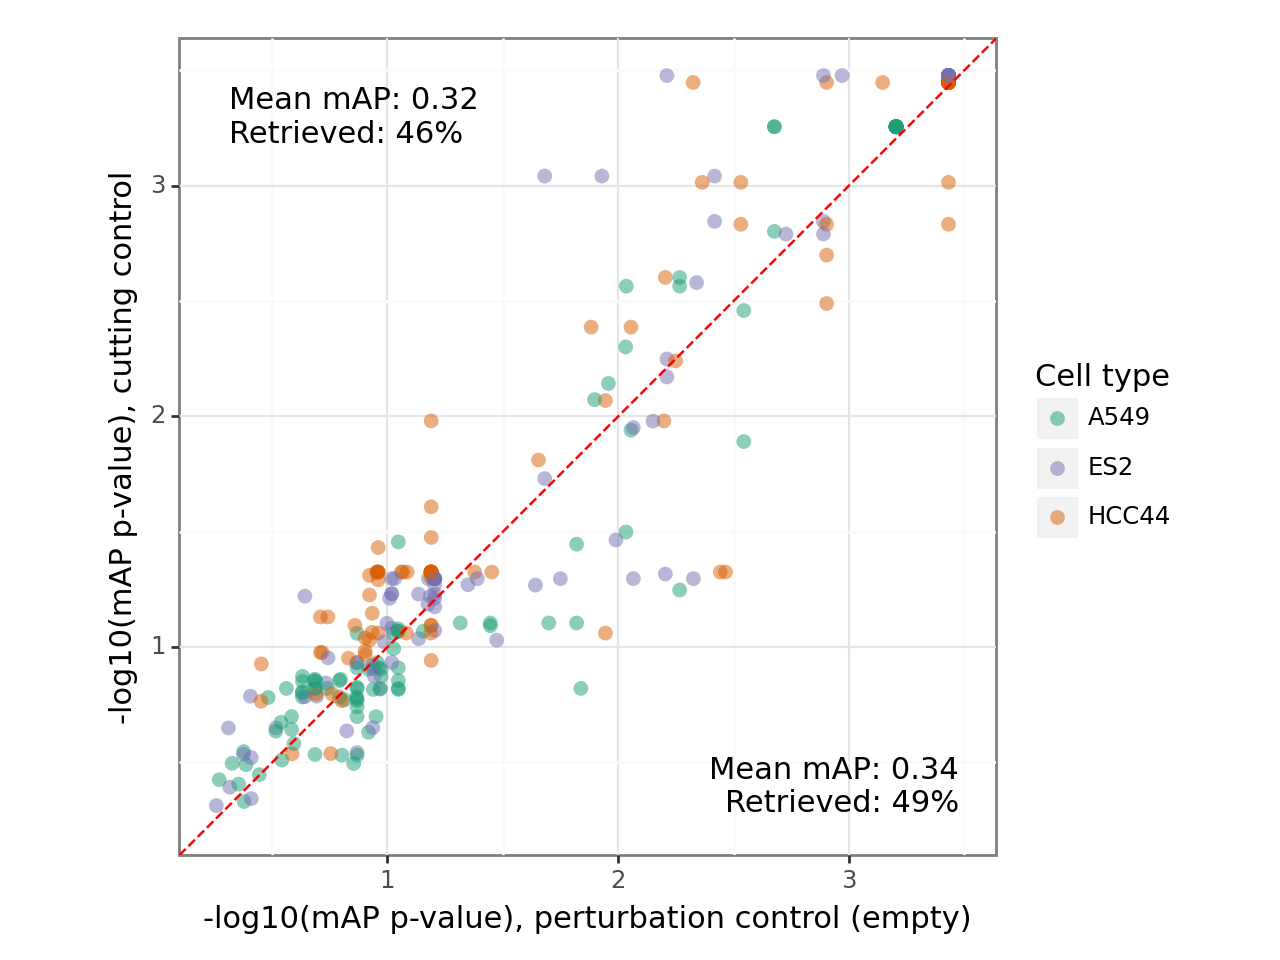

<Figure Size: (640 x 480)>

In [9]:
grit_barcode_comparison_gg = (
    gg.ggplot(control_compare_df, gg.aes(x="perturbation_control", y="cutting_control"))
    + gg.geom_point(gg.aes(fill="Cell type"), size=3, stroke=0.0, alpha=0.5)
    + gg.scale_fill_manual(name="Cell type", values=cell_line_colors)
    + gg.theme_bw()
    + gg.xlab("-log10(mAP p-value), perturbation control (empty)")
    + gg.ylab("-log10(mAP p-value), cutting control")
    # + gg.ggtitle("Cell health barcode control comparison")
    + gg.geom_abline(intercept=0, slope=1, linetype="dashed", color="red")
    + gg.coord_fixed()
    + gg.annotate(
        "text",
        x=min(control_compare_df["cutting_control"]),
        y=max(control_compare_df["perturbation_control"]),
        label=f"Mean mAP: {cutting_mean:.2f}\nRetrieved: {below_diagonal:.0%}",
        ha="left",
        va="top",
    )
    + gg.annotate(
        "text",
        x=max(control_compare_df["cutting_control"]),
        y=min(control_compare_df["perturbation_control"]),
        label=f"Mean mAP: {perturbation_mean:.2f}\nRetrieved: {above_diagonal:.0%}",
        ha="right",
        va="bottom",
    )
    + gg.theme(
        legend_key=gg.element_rect(color="white"),
    )
)

output_file = "figures/control_comparison"
grit_barcode_comparison_gg.save(f"{output_file}.png", dpi=500, height=3.5, width=4)
grit_barcode_comparison_gg.save(f"{output_file}.svg")

grit_barcode_comparison_gg

### Plot phenotypic activity vs CERES scores

In [10]:
mg = mygene.MyGeneInfo()

result = mg.querymany(
    guide_results.Metadata_gene_name.unique().tolist(),
    scopes="symbol",
    species="human",
    fields="entrezgene,symbol,ensembl.gene,",
    as_dataframe=True,
)

ncbi_id_df = (
    result.drop_duplicates(subset="_id").loc[:, ["_id"]].reset_index(drop=False)
)
guide_results = guide_results.merge(
    ncbi_id_df, left_on="Metadata_gene_name", right_on="query", how="left"
)

querying 1-51...done.
Finished.
3 input query terms found no hit:
	['ATP50', 'BRAF1', 'XBP']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [11]:
# Load ceres data
ceres_dir = Path("data/")
ceres_file = Path(f"{ceres_dir}/ceres.csv")
depmap_sample_file = Path(f"{ceres_dir}/depmap_sample_info.csv")

ceres_df = pd.read_csv(ceres_file, index_col=0)
depmap_sample_df = pd.read_csv(depmap_sample_file, index_col=0)

# Clean gene name column
hgnc = [x.split(" ")[0] for x in ceres_df.columns]
ncbi_gene_id = [x.split(" ")[1].strip("()") for x in ceres_df.columns]

ceres_genes_df = (
    pd.DataFrame([hgnc, ncbi_gene_id], index=["HGNC", "NCBI"])
    .transpose()
    .sort_values(by="HGNC")
    .reset_index(drop=True)
)
ceres_df.columns = ncbi_gene_id
ceres_df = depmap_sample_df.merge(
    ceres_df, left_index=True, right_index=True, how="right"
)
assert all([x in ceres_df.stripped_cell_line_name.tolist() for x in cell_lines])

In [12]:
cols = ["stripped_cell_line_name"] + guide_results._id.dropna().unique().tolist()
ceres_subset_df = (
    ceres_df.query("stripped_cell_line_name in @cell_lines")
    .loc[:, cols]
    .reset_index()
    .melt(
        id_vars=["DepMap_ID", "stripped_cell_line_name"],
        var_name="_id",
        value_name="ceres_score",
    )
)

cell_health_results_df = guide_results.merge(
    ceres_subset_df,
    left_on=["_id", "Cell type"],
    right_on=["_id", "stripped_cell_line_name"],
    how="left",
)

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 3.5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/map_ceres_comparison.png
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 30 rows containing missing values.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/map_ceres_comparison.svg
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Rem

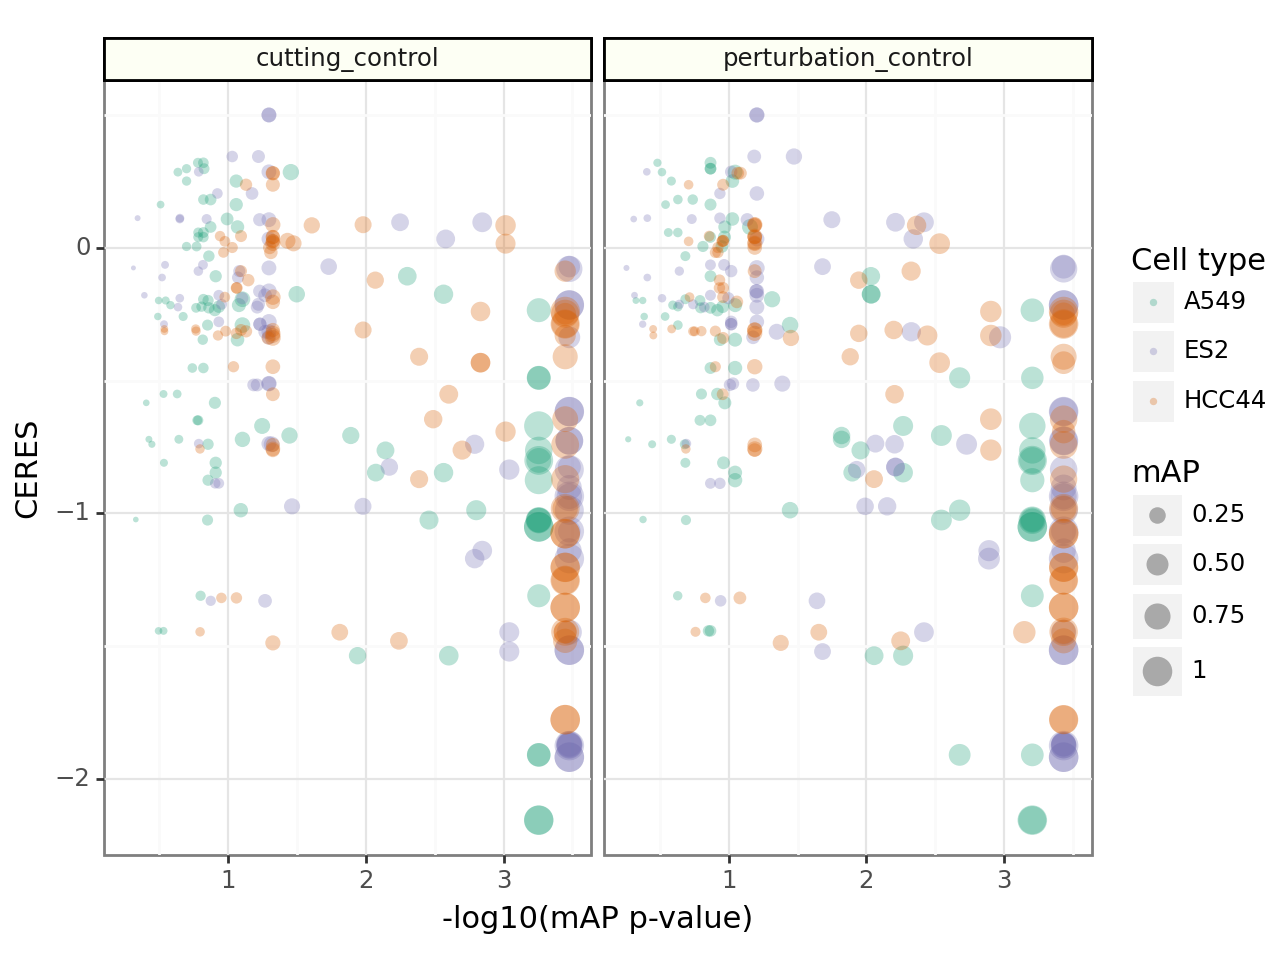

<Figure Size: (640 x 480)>

In [13]:
map_ceres_comparison_gg = (
    gg.ggplot(
        cell_health_results_df,
        gg.aes(x="-log10(mAP p-value)", y="ceres_score", size="mAP"),
    )
    + gg.geom_point(gg.aes(fill="Cell type"), stroke=0.0, alpha=0.3)
    + gg.scale_fill_manual(name="Cell type", values=cell_line_colors)
    + gg.theme_bw()
    + gg.xlab("-log10(mAP p-value)")
    + gg.ylab("CERES")
    # + gg.ggtitle("Cell Health")
    + gg.facet_wrap("~control_barcodes", ncol=2)
    + gg.theme(
        strip_background=gg.element_rect(color="black", fill="#fdfff4"),
        legend_key=gg.element_rect(color="white"),
    )
)

output_file = Path(f"{save_path}/map_ceres_comparison.png")
map_ceres_comparison_gg.save(output_file, dpi=500, height=3.5, width=6)
map_ceres_comparison_gg.save(output_file.with_suffix(".svg"))

map_ceres_comparison_gg